In [92]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['BreadBasket_DMS.csv']


In [93]:
df = pd.read_csv("../input/BreadBasket_DMS.csv")

In [94]:
df.head()


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
Date           21293 non-null object
Time           21293 non-null object
Transaction    21293 non-null int64
Item           21293 non-null object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [96]:
#unique items bought
df["Item"].nunique()

95

In [97]:
#Count of individual items bought
df["Item"].value_counts()

Coffee                           5471
Bread                            3325
Tea                              1435
Cake                             1025
Pastry                            856
NONE                              786
Sandwich                          771
Medialuna                         616
Hot chocolate                     590
Cookies                           540
Brownie                           379
Farm House                        374
Muffin                            370
Alfajores                         369
Juice                             369
Soup                              342
Scone                             327
Toast                             318
Scandinavian                      277
Truffles                          193
Coke                              185
Spanish Brunch                    172
Fudge                             159
Baguette                          152
Jam                               149
Tiffin                            146
Mineral wate

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94],
 <a list of 95 Text xticklabel objects>)

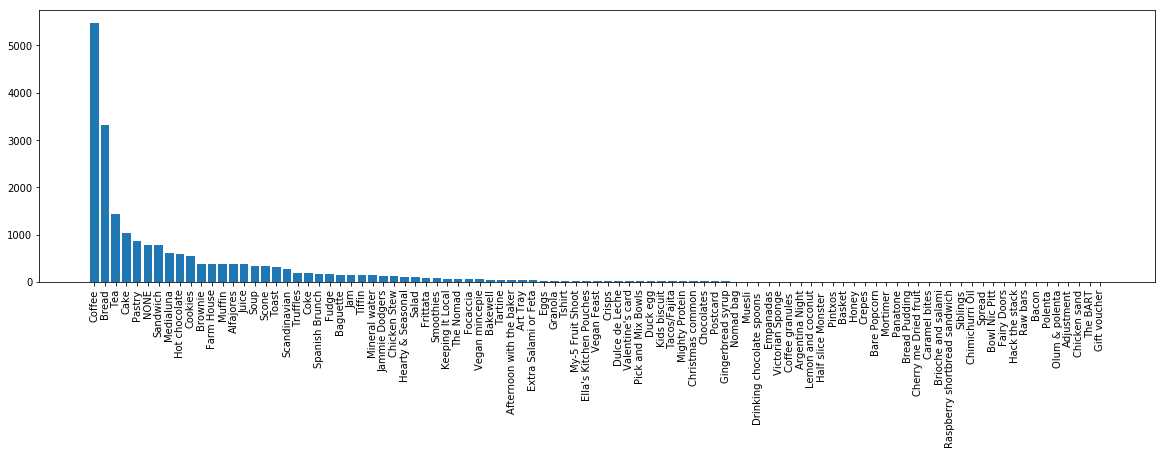

In [98]:
#Graph of Number of items bought of particular category
plt.rc('figure', figsize=(20,5))
plt.bar(df["Item"].value_counts().index,df["Item"].value_counts())
plt.xticks(rotation=90)


<BarContainer object of 24 artists>

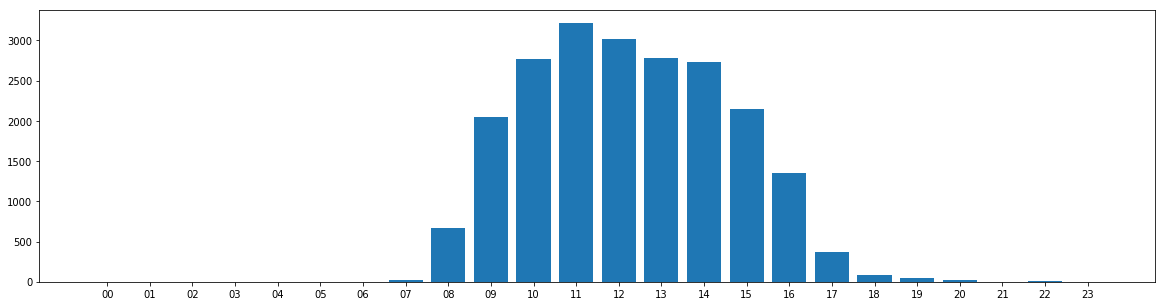

In [99]:
#Hourly graph of transactions
hours = ["%.2d" % i for i in range(24)]
transaction_count = []
for j in range(24):
    
    if hours[j] == "23":
        time_df = df[(df["Time"] >= ""+hours[j]+":00:00") & (df["Time"] <= "00:00:00")]
    else:
        time_df = df[(df["Time"] >= ""+hours[j]+":00:00") & (df["Time"] <= ""+hours[j+1]+":00:00")]
    
    transaction_count.append(time_df["Item"].count())
    
plt.bar(hours,transaction_count)